All imports:

In [145]:
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

define helpful functions

In [146]:
def display_image(mat_like, cmap="rgb"):
    plt.figure()
    if cmap != "rgb":
        plt.imshow(mat_like, cmap=cmap)
    else:
        plt.imshow(mat_like)
    plt.show()
    plt.close()

In [ ]:
def clean_image(gray):
    # gray = cv2.equalizeHist(gray)
    gray = cv2.equalizeHist(gray)
    display_image(gray, "gray")
    # _, gray = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY_INV)
    _, gray = cv2.adaptiveThreshold(gray, 100, 255, cv2.ADAPTIVE_THRESH_MEAN_C)
    display_image(gray, "gray")
    # clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(7, 7))
    # gray = cv2.medianBlur(gray, 21)
    # gray = clahe.apply(gray)
    return gray

    # gray = cv2.equalizeHist(gray)
    # gray = cv2.medianBlur(gray, 21)

In [148]:
def get_circles(gray, color):
    gray = clean_image(gray)
    # display_image(gray, "gray")
    circles = cv2.HoughCircles(
        gray,
        cv2.HOUGH_GRADIENT,
        dp=0.8,  # down sample size
        minDist=40,  # minimum distance between detected circles
        param1=40,
        param2=60,
        minRadius=60,
        maxRadius=100,
    )

    if circles is None:
        return
    color_img_cpy = np.copy(color)
    circles = np.uint(np.around(circles))

    for circle in circles[0, :]:
        x, y, r = circle[0], circle[1], circle[2]
        cv2.circle(color_img_cpy, (x, y), r, (255, 255, 255), 5)

    display_image(color_img_cpy)

Load Image folders

In [149]:
current_folder = os.getcwd()
root_data_folder = os.path.join(current_folder, "local_data")
random_frames_folder = os.path.join(root_data_folder, "random_frames")
sequence_1_folder = os.path.join(root_data_folder, "sequence_1")
sequence_2_folder = os.path.join(root_data_folder, "sequence_2")
sequence_3_folder = os.path.join(root_data_folder, "sequence_3")
sequence_4_folder = os.path.join(root_data_folder, "sequence_4")

load one image for testing

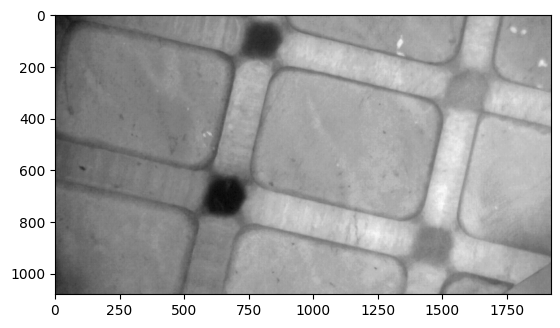

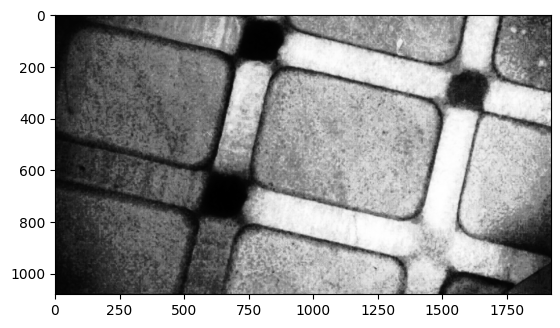

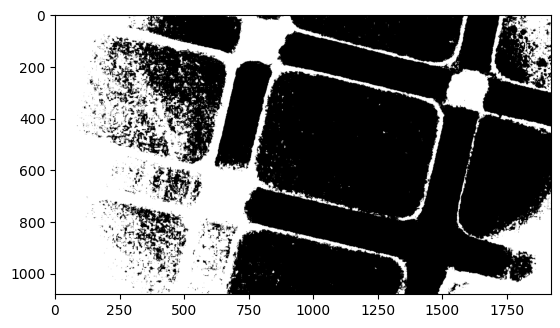

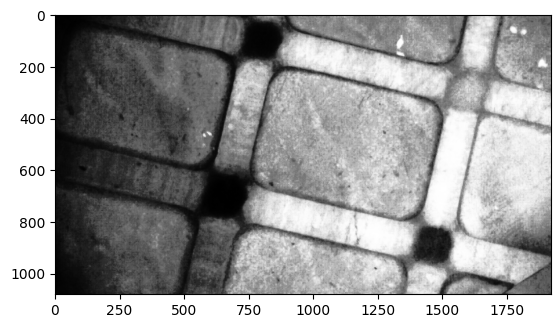

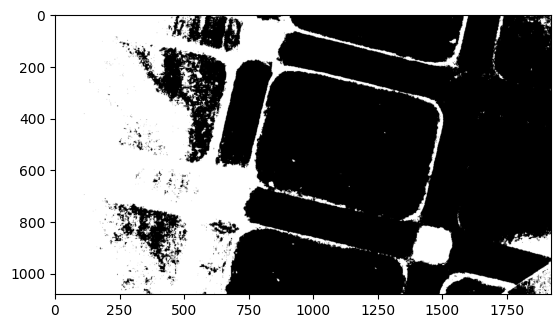

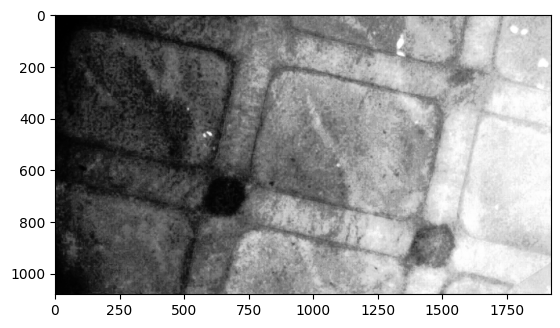

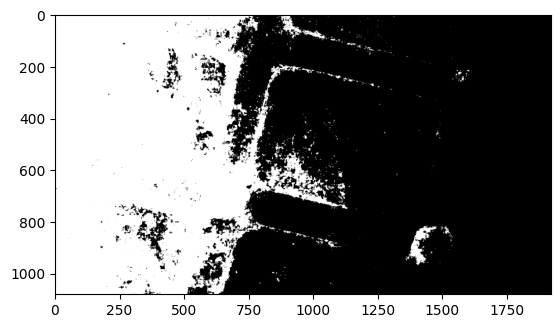

In [150]:
img_path = os.path.join(random_frames_folder, "random_001.jpg")

rnd_img = cv2.imread(img_path)
color = cv2.cvtColor(rnd_img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(rnd_img, cv2.COLOR_BGR2GRAY)

display_image(gray, "gray")

r, g, b = cv2.split(color)

# display_image(r, "gray")
get_circles(r, color)
# display_image(g, "gray")
get_circles(g, color)
# display_image(b, "gray")
get_circles(b, color)

# display_image(rnd_img_gray)